In [22]:
import implementation

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

In [34]:
#TO DO: create targets for the patterns

def lin_sep_data(n=100, mA=np.array([1.5,1.5]), mB=np.array([-1.5,-1.5]), sigmaA=0.5, sigmaB=0.5):
    """
    Creates 2 class lin sep dataset.
    
    Inputs:
    n = samples (must be even number)
    mA = mean of distrbution A
    mB = ___________________ B
    sigmaA = std. dev of A
    sigmaB = ___________ B
    
    Outputs:
    data = linearly separable dataset, where last column is targets (class), rest is patterns(features)
    """
    
    #keep making datasets until lin sep dataset is made ; will enter infinite loop if you choose shitty mean and sigmas
    separable = False
    while not separable:
        
        #create data
        A = np.array([np.random.normal(mA[0],sigmaA,(n//2,1)), np.random.normal(mA[1],sigmaA,(n//2,1))]).reshape(n//2,2)
        A = np.append(A,np.ones((n//2,1)),axis=1) # add targets
        B = np.array([np.random.normal(mB[0],sigmaB,(n//2,1)), np.random.normal(mB[1],sigmaB,(n//2,1))]).reshape(n//2,2)
        B = np.append(B,np.ones((n//2,1))*-1,axis=1) # add targets
        
        print(A.shape)
        print(B.shape)
        
        #only checks for vertical or horizontal separability
        separable = any([A[:, k].max() < B[:, k].min() or A[:, k].min() > B[:, k].max() for k in range(2)])
        
    #shuffle samples
    data = np.append(A,B,axis=0)
    data = np.random.shuffle(np.append(A,B,axis=0))
    
    #visualise
    plt.plot(A[:, 0], A[:, 1], 'r.',label='class A')
    plt.plot(B[:, 0], B[:, 1], 'b.',label='class B')
    plt.legend()
    plt.show()
    
    return data


(50, 3)
(50, 3)


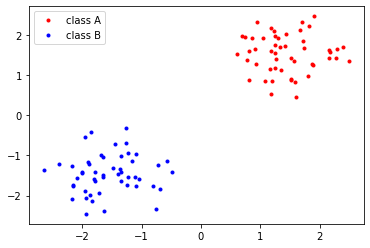

()


In [35]:
data = lin_sep_data()
print(np.shape(data))

In [23]:
class single_layered_perceptron():
    """
    Creates a single layer perceptron with 2 inputs and 2 outputs. 
    Change layers and weight&bias initialisation shapes for other input/output dimensions.
    
    Inputs:
    layers = [input,output]
    update = 'batch' or 'sequential' learning
    learning = 'delta' rule or 'perceptron' rule
    lr = learning rate
    weights = init by randomly sampled around 0 with std dev 1
    bias = init as 0s
    """
    
    def __init__(self, layers=[2,2], lr=.1, update='batch', learning='perceptron', weights=np.random.normal(0,1,(2,2)), bias=np.zeros((1,2))):
        
        self.layers=layers
        self.lr=.1
        self.learning=learning
        self.update = update
        self.weights = np.append(weights,bias,axis=0) #biases are last weight matrix entry
    
    def batch(self):
        
        
    

SyntaxError: unexpected EOF while parsing (<ipython-input-23-4f1ea4d344f2>, line 5)

In [ ]:
class neural_network():
    def __init__(self, layers=[2, 100, 2], scale=.1, p=.1, lr=.1, lam=.1):
        super().__init__()
        self.weights = tr.nn.ParameterList([tr.nn.Parameter(scale * tr.randn(m, n)) for m, n in zip(layers[:-1], layers[1:])])
        self.biases = tr.nn.ParameterList([tr.nn.Parameter(scale * tr.randn(n)) for n in layers[1:]])
        self.parameters = list(self.weights) + list(self.biases)

        self.p = p
        self.lr = lr
        self.lam = lam
        self.train = False

    def relu(self, X, W, b):
        # algorithm 15, pg 46 from guide.pdf
        if self.train:
            delta = bernoulli.rvs(1 - self.p,
                                  size=W.shape[1])  # sample 'out' many samples from Bernoulli distribution B(1-p)
            Z = tr.from_numpy(delta) * tr.max(tr.zeros(X.shape[0], W.shape[1]), tr.mm(X, W) + b)

        else:
            Z = tr.max(tr.zeros(X.shape[0], W.shape[1]), (1 - self.p) * tr.mm(X, W) + b)

        return Z

    def softmax(self, Z, W, b):
        # algorithm 16, pg 46 from guide.pdf
        Z = tr.mm(Z, W) + b
        y_hat = tr.div(tr.exp(Z).T, tr.sum(tr.exp(Z), dim=1)).T

        return y_hat

    def forward(self, X):
        # algorithm 14, pg 45 from guide.pdf
        X = tr.tensor(X, dtype=tr.float)
        Z = X
        # apply ReLU to all layers but the last
        for w, b in zip(self.weights[:len(self.weights) - 1],
                        self.biases[:len(self.biases) - 1]):  # iterate through L-1 layers
            Z = self.relu(Z, w, b)
        # apply softmax to last layer
        y_hat = self.softmax(Z, self.weights[len(self.weights) - 1], self.biases[len(self.biases) - 1])

        return y_hat

    def predict(self, X):
        return self.forward(X).detach().numpy()

    def loss(self, ypred, ytrue):
        # compute cross entropy loss according to pg47 from guide.pdf
        loss = (-1 / ytrue.shape[0]) * tr.sum(ytrue * tr.log(ypred))

        return loss

    def fit(self, X, y, nsteps=1000, bs=100, plot=False):
        X, y = tr.tensor(X), tr.tensor(y)
        optimizer = tr.optim.SGD(self.parameters, lr=self.lr, weight_decay=self.lam)

        I = tr.randperm(X.shape[0])
        n = int(np.ceil(.1 * X.shape[0]))
        Xtrain, ytrain = X[I[:n]], y[I[:n]]
        Xval, yval = X[I[n:]], y[I[n:]]

        Ltrain, Lval, Aval = [], [], []
        for i in range(nsteps):
            optimizer.zero_grad()
            I = tr.randperm(Xtrain.shape[0])[:bs]
            self.train = True
            output = self.loss(self.forward(Xtrain[I]), ytrain[I])
            self.train = False
            Ltrain += [output.item()]
            output.backward()
            optimizer.step()

            outval = self.forward(Xval)
            Lval += [self.loss(outval, yval).item()]
            Aval += [np.array(outval.argmax(-1) == yval.argmax(-1)).mean()]

        if plot:
            plt.plot(range(nsteps), Ltrain, label='Training loss')
            plt.plot(range(nsteps), Lval, label='Validation loss')
            plt.plot(range(nsteps), Aval, label='Validation acc')
            plt.legend()
            plt.show()